# O Passeio Aleat√≥rio 1D:

Compara√ß√£o entre Simula√ß√£o e Teoria

Um Passeio Aleat√≥rio 1D descreve o movimento de uma part√≠cula que se desloca em uma linha reta, dando um passo para a direita (+1) ou para a esquerda (-1) a cada instante de tempo. Cada passo √© independente do anterior e tem uma probabilidade igual de ocorrer (geralmente 0.5 para cada dire√ß√£o em um passeio sim√©trico).


#Binomial


A Distribui√ß√£o Binomial √© uma distribui√ß√£o de probabilidade discreta que descreve o n√∫mero de sucessos em uma sequ√™ncia de $n$ ensaios independentes de Bernoulli, cada um com uma probabilidade $p$ de sucesso. No contexto do passeio aleat√≥rio 1D, podemos fazer uma conex√£o direta:

* Ensaios: Cada passo do passeio (`n_steps`) pode ser considerado um ensaio.
* Sucesso: Um "sucesso" pode ser definido como dar um passo para a direita (+1). A probabilidade de "sucesso" ($p$) √© 0.5 para um passeio sim√©trico.
* Fracasso: Um "fracasso" seria dar um passo para a esquerda (-1), com probabilidade $1-p = 0.5$.

Se considerarmos que um passeio de $n$ passos tem $k$ passos para a direita e, consequentemente, $n-k$ passos para a esquerda, a posi√ß√£o final $X$ ser√° dada por $X = k - (n-k) = 2k - n$.

A probabilidade de ter exatamente $k$ passos para a direita em $n$ passos √© dada pela Fun√ß√£o Massa de Probabilidade (PMF) da distribui√ß√£o binomial:

$$P(K=k) = C(n, k) \cdot p^k \cdot (1-p)^{n-k}$$

Onde:
* $C(n, k)$ √© o coeficiente binomial ("n escolhe k"), que representa o n√∫mero de maneiras de obter $k$ sucessos em $n$ ensaios.
* $p$ √© a probabilidade de um passo para a direita (0.5 no nosso caso).
* $k$ √© o n√∫mero de passos para a direita.


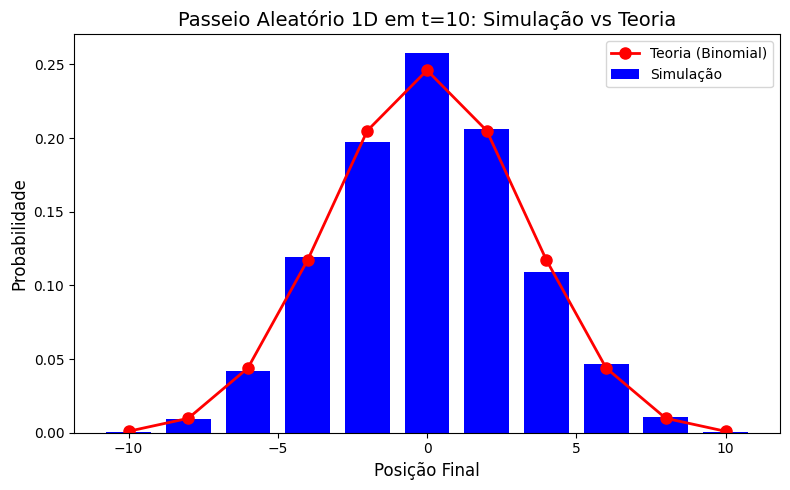

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Par√¢metros da simula√ß√£o
n_simulations = 10**4   # N√∫mero de simula√ß√µes
n_steps = 10            # N√∫mero de passos (tempo t=10)

# Simula√ß√£o do passeio aleat√≥rio 1D
def random_walk_1d(n_steps):
    """Simula um passeio aleat√≥rio 1D com n_steps passos."""
    steps = np.random.choice([-1, 1], size=n_steps)
    return np.sum(steps)

# Executar m√∫ltiplas simula√ß√µes
final_positions = np.array([random_walk_1d(n_steps) for _ in range(n_simulations)])

# Calcular as posi√ß√µes poss√≠veis (sempre pares porque n_steps √© par)
possible_positions = np.arange(-n_steps, n_steps + 1, 2)

# Calcular frequ√™ncias observadas
observed_counts = np.array([np.sum(final_positions == pos) for pos in possible_positions])
observed_probs = observed_counts / n_simulations

# Calcular a distribui√ß√£o te√≥rica binomial
n = n_steps
k_values = (possible_positions + n) // 2  # Converter posi√ß√£o para n√∫mero de passos √† direita
theoretical_probs = binom.pmf(k_values, n, 0.5)

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.bar(possible_positions, observed_probs, width=1.5, color='blue',label='Simula√ß√£o')
plt.plot(possible_positions, theoretical_probs, 'ro-', linewidth=2, markersize=8, label='Teoria (Binomial)')

# Configura√ß√µes do gr√°fico
plt.title('Passeio Aleat√≥rio 1D em t=10: Simula√ß√£o vs Teoria', fontsize=14)
plt.xlabel('Posi√ß√£o Final', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.legend()
plt.tight_layout()


#Scaling

Coeficiente angular do ajuste linear: 0.9970 (te√≥rico = 1.0)


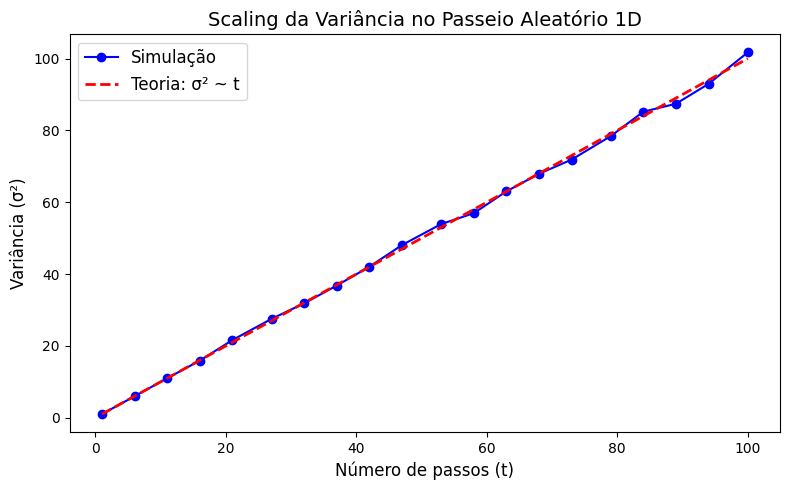

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Par√¢metros da simula√ß√£o
n_simulations = 10**4  # N√∫mero de simula√ß√µes para cada tempo
max_steps = 100        # N√∫mero m√°ximo de passos a considerar
step_points = 20       # N√∫mero de pontos de tempo para avaliar

# Gerar tempos (passos) igualmente espa√ßados
time_points = np.linspace(1, max_steps, step_points, dtype=int)

# Simula√ß√£o do passeio aleat√≥rio 1D
def simulate_random_walks(n_steps, n_simulations):
    """Simula m√∫ltiplos passeios aleat√≥rios e retorna a vari√¢ncia da posi√ß√£o final."""
    final_positions = np.zeros(n_simulations)
    for i in range(n_simulations):
        steps = np.random.choice([-1, 1], size=n_steps)
        final_positions[i] = np.sum(steps)
    return np.var(final_positions)

# Calcular vari√¢ncias para diferentes tempos
simulated_variances = np.zeros(len(time_points))
for i, t in enumerate(time_points):
    simulated_variances[i] = simulate_random_walks(t, n_simulations)

# Resultado te√≥rico: vari√¢ncia ~ n√∫mero de passos
theoretical_variances = time_points

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.plot(time_points, simulated_variances, 'bo-', label='Simula√ß√£o', markersize=6)
plt.plot(time_points, theoretical_variances, 'r--', label='Teoria: œÉ¬≤ ~ t', linewidth=2)

# Configura√ß√µes do gr√°fico
plt.title('Scaling da Vari√¢ncia no Passeio Aleat√≥rio 1D', fontsize=14)
plt.xlabel('N√∫mero de passos (t)', fontsize=12)
plt.ylabel('Vari√¢ncia (œÉ¬≤)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Ajuste linear para verificar o scaling
coefficients = np.polyfit(time_points, simulated_variances, 1)
print(f"Coeficiente angular do ajuste linear: {coefficients[0]:.4f} (te√≥rico = 1.0)")


#Gaussiana

   - Para N passos no tempo total t = N*dt
   - Vari√¢ncia total = N √ó vari√¢ncia de cada passo = 2Dt
   - Logo, vari√¢ncia de cada passo = 2Ddt
   - Desvio padr√£o = ‚àövari√¢ncia = ‚àö(2Ddt)



> Introdu√ß√£o

O c√≥digo abaixo simula a equa√ß√£o de difus√£o 1D usando o m√©todo de Monte Carlo com passeios aleat√≥rios.

A equa√ß√£o de difus√£o √©:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

Para uma condi√ß√£o inicial delta (todas as part√≠culas concentradas na origem), a solu√ß√£o anal√≠tica √© uma distribui√ß√£o gaussiana:

$$
u(x,t) = \frac{1}{\sqrt{4\pi D t}} \exp\left(-\frac{x^2}{4Dt}\right)
$$

> Rela√ß√£o Entre Passeio Aleat√≥rio e Difus√£o


- N passos no tempo total t = N √ó dt
  - Onde:
    - `N` = n√∫mero total de passos
    - `dt` = intervalo de tempo por passo


Para reproduzir corretamente a difus√£o:

1. Vari√¢ncia Total:
   - Pela solu√ß√£o anal√≠tica, a vari√¢ncia da gaussiana √©  
    $$
     \sigma^2 = 2Ddt
     $$

   

2. Vari√¢ncia por Passo:
   - Como cada passo √© independente:
     $$
     \text{Vari√¢ncia total} = N \times \text{Vari√¢ncia de cada passo} = 2Dt
     $$
   - Substituindo N = t/dt:
     $$
     \frac{t}{dt} \times \text{Var(passo)} = 2Dt
     $$
   - Portanto:
     $$
     \text{Var(passo)} = 2Ddt
     $$

3. Desvio Padr√£o do Passo:
   - O desvio padr√£o √© a raiz quadrada da vari√¢ncia:
     $$
     \sigma_{\text{passo}} = \sqrt{2Ddt}
     $$
   - No c√≥digo: `np.random.normal(0, np.sqrt(2*D*dt))`simula part√≠culas fazendo passeios aleat√≥rios com passos ‚àº ùí©(0, ‚àö(2Ddt))


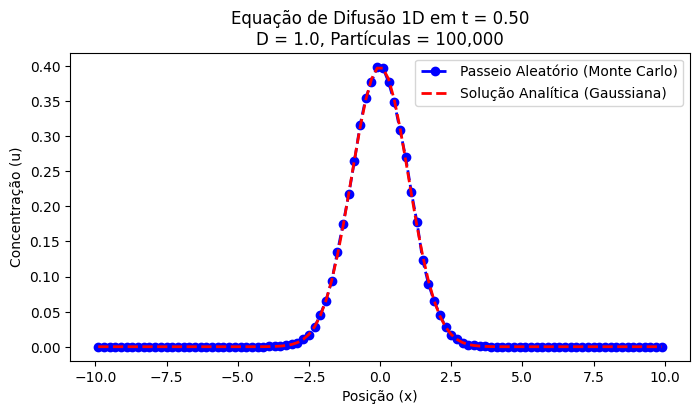

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

# Par√¢metros da simula√ß√£o
D = 1.0       # Coeficiente de difus√£o
L = 10.0      # Tamanho do dom√≠nio [-L, L]
Nx = 100      # N√∫mero de pontos espaciais
N_particles = 10**5  # N√∫mero de part√≠culas
t_final = 0.5 # Tempo final da simula√ß√£o
dx = 2 * L / Nx  # Passo espacial
dt = 0.01     # Passo temporal (para o passeio aleat√≥rio)

# Grade espacial
x = np.linspace(-L, L, Nx + 1)

# Inicializa as posi√ß√µes das part√≠culas (todas come√ßam em x=0 para condi√ß√£o inicial delta)
particles = np.zeros(N_particles)

# Fun√ß√£o para realizar o passeio aleat√≥rio
def random_walk(particles, D, dt):
    # Cada part√≠cula se move com um passo aleat√≥rio (movimento browniano)
    # O desvio padr√£o √© sqrt(2*D*dt) - ver explica√ß√£o no final do c√≥digo
    steps = np.random.normal(0, np.sqrt(2 * D * dt), size=particles.shape)
    particles += steps
    return particles

# Fun√ß√£o para calcular a solu√ß√£o anal√≠tica
def analytical_solution(x, t, D):
    # Solu√ß√£o exata da equa√ß√£o de difus√£o para condi√ß√£o inicial delta
    return (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))

# Evolu√ß√£o temporal
current_time = 0.0
while current_time < t_final:
    particles = random_walk(particles, D, dt)
    current_time += dt

# Calcula a solu√ß√£o num√©rica a partir das posi√ß√µes das part√≠culas
hist, bins = np.histogram(particles, bins=x, density=True)
x_centers = (bins[:-1] + bins[1:]) / 2  # Usa os centros dos bins para plotar

# Calcula a solu√ß√£o anal√≠tica
u_analytical = analytical_solution(x_centers, t_final, D)

# Plota os resultados
plt.figure(figsize=(8,4))
plt.plot(x_centers, hist, 'bo--', label='Passeio Aleat√≥rio (Monte Carlo)', linewidth=2)
plt.plot(x_centers, u_analytical, 'r--', label='Solu√ß√£o Anal√≠tica (Gaussiana)', linewidth=2)
plt.title(f'Equa√ß√£o de Difus√£o 1D em t = {t_final:.2f}\nD = {D}, Part√≠culas = {N_particles:,}')
plt.xlabel('Posi√ß√£o (x)')
plt.ylabel('Concentra√ß√£o (u)')
plt.legend();
